In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [12]:
dataset2 = pd.read_csv('Exp_2.csv',na_values='0').dropna(axis=1)
X2 = dataset2.iloc[:, :-1].values
y2 = dataset2.iloc[:, -1].values

In [13]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
bpnn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
svm = SVC(kernel='rbf', gamma='scale', probability=True)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
ada_rf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0),
                            n_estimators=100, random_state=0)
ada_svm = AdaBoostClassifier(base_estimator=SVC(kernel='rbf', gamma='scale', probability=True),
                             n_estimators=100, random_state=0)
xgb = XGBClassifier()

In [15]:
models2 = [knn, bpnn, svm, rf, ada_rf, ada_svm, xgb]
model_names = ['KNN', 'BPNN', 'Kernel SVM', 'Random Forest', 'Adaboost Random Forest', 'Adaboost SVM', 'XGBoost']

In [18]:
for i, model in enumerate(models2):
    print(f"Training {model_names[i]}...")
    model.fit(X2_train,y2_train)

Training KNN...
Training BPNN...
Training Kernel SVM...
Training Random Forest...
Training Adaboost Random Forest...
Training Adaboost SVM...
Training XGBoost...


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN accuracy: 1.0
KNN confusion matrix:
[[119   0]
 [  0  46]]
KNN ROC AUC: 1.0


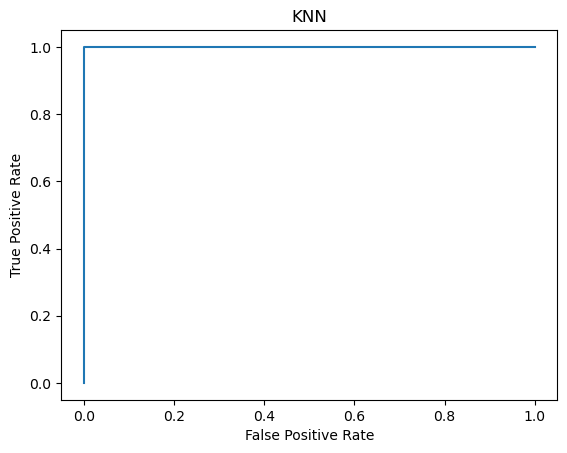

----------------------------------------------------
BPNN accuracy: 0.7212121212121212
BPNN confusion matrix:
[[119   0]
 [ 46   0]]
BPNN ROC AUC: 0.5


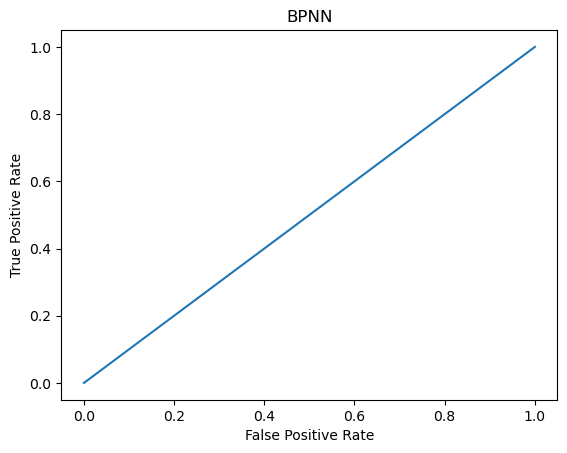

----------------------------------------------------
Kernel SVM accuracy: 0.7515151515151515
Kernel SVM confusion matrix:
[[119   0]
 [ 41   5]]
Kernel SVM ROC AUC: 0.6521739130434783


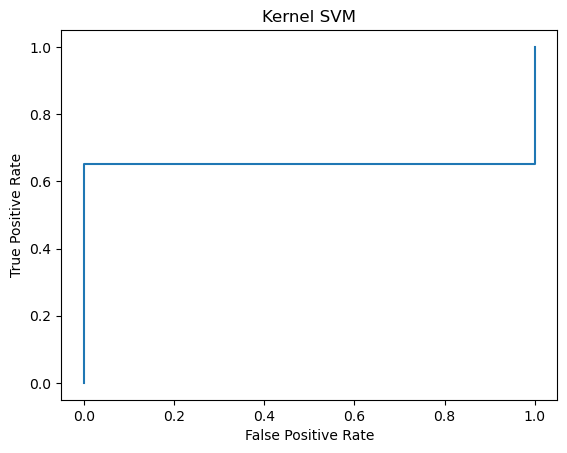

----------------------------------------------------
Random Forest accuracy: 1.0
Random Forest confusion matrix:
[[119   0]
 [  0  46]]
Random Forest ROC AUC: 1.0


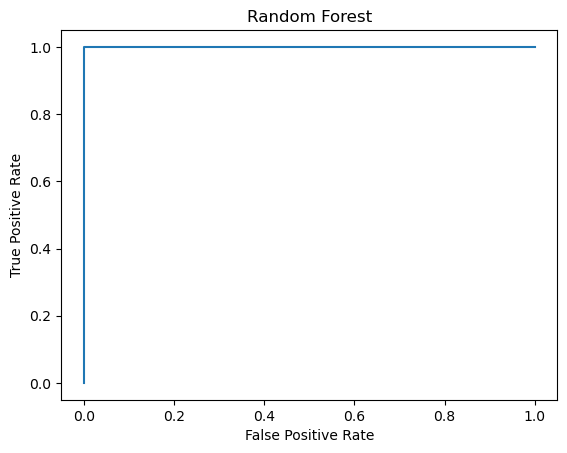

----------------------------------------------------
Adaboost Random Forest accuracy: 1.0
Adaboost Random Forest confusion matrix:
[[119   0]
 [  0  46]]
Adaboost Random Forest ROC AUC: 1.0


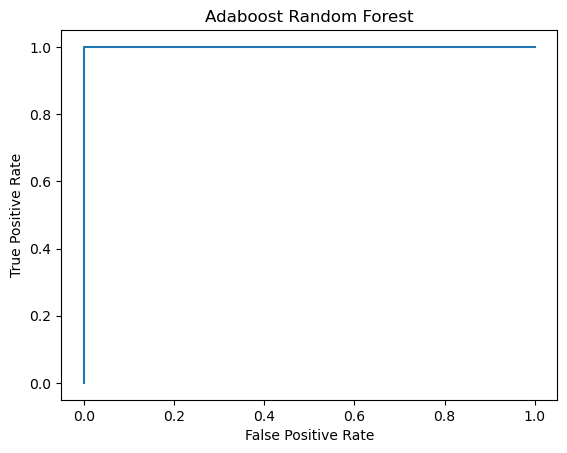

----------------------------------------------------
Adaboost SVM accuracy: 0.7212121212121212
Adaboost SVM confusion matrix:
[[119   0]
 [ 46   0]]
Adaboost SVM ROC AUC: 0.717391304347826


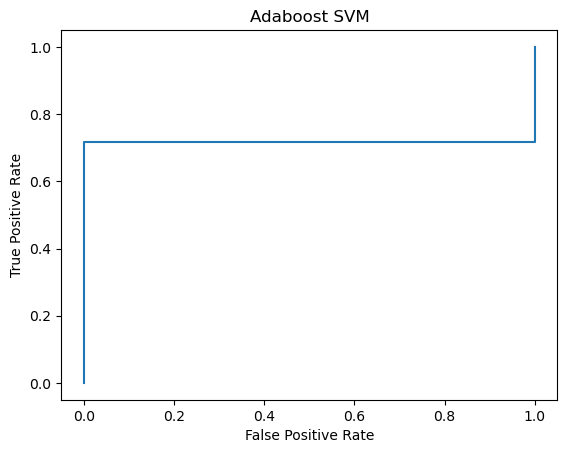

----------------------------------------------------
XGBoost accuracy: 0.9878787878787879
XGBoost confusion matrix:
[[119   0]
 [  2  44]]
XGBoost ROC AUC: 1.0


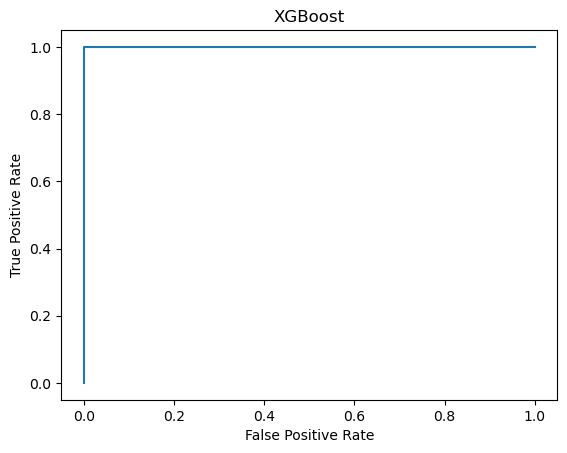

----------------------------------------------------


In [19]:
for i, model in enumerate(models2):
    y_pred = model.predict(X2_test)
    acc = accuracy_score(y2_test, y_pred)
    cm = confusion_matrix(y2_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y2_test, model.predict_proba(X2_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    print(f"{model_names[i]} accuracy: {acc}")
    print(f"{model_names[i]} confusion matrix:\n{cm}")
    print(f"{model_names[i]} ROC AUC: {roc_auc}")
    plt.plot(fpr,tpr)
    plt.title(model_names[i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print("----------------------------------------------------")

In [48]:
xp = dataset2.iloc[: , :-1]
yp = dataset2.iloc[:, -1]

In [49]:
norm = Normalizer()
columns = xp.columns
x_norm = norm.fit_transform(xp)
x_norm = pd.DataFrame(x_norm, columns = columns)
x_norm.head()

,F1,F2,F3,F4,F5,F6,F13,F14,F15,F16,...,F87,F88,F89,F90,F91,F92,F93,F94,F95,F96
0,0.037306,0.037306,0.037306,0.301208,0.301208,0.300980,0.080031,0.080031,0.080031,0.484614,...,0.000005,0.000006,0.000006,0.000006,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019
1,0.032699,0.032699,0.032699,0.280976,0.280976,0.280608,0.060938,0.060938,0.060938,0.499669,...,0.000004,0.000006,0.000006,0.000006,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019
2,0.026154,0.026154,0.026154,0.265906,0.265906,0.265142,0.049400,0.049400,0.049400,0.509539,...,0.000004,0.000006,0.000006,0.000006,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019
3,0.044646,0.044646,0.044646,0.330993,0.330993,0.330708,0.078526,0.078526,0.078526,0.464409,...,0.000004,0.000005,0.000005,0.000005,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
4,0.033167,0.033167,0.033167,0.340988,0.340988,0.340112,0.063089,0.063089,0.063089,0.460622,...,0.000004,0.000005,0.000005,0.000005,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017


In [50]:
pca = PCA(n_components = 2)
pca.fit(x_norm)
x_pca = pca.transform(x_norm)

In [51]:
x_pca = pd.DataFrame(x_pca, columns = ['Feature_1', 'Feature_2'])
x_pca.head()

,Feature_1,Feature_2
0,0.029888,0.002475
1,0.077907,-0.024651
2,0.112228,-0.042671
3,-0.032063,-0.003627
4,-0.045120,-0.038436


In [52]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
yp = label_encoder.fit_transform(yp)
yp = pd.DataFrame(yp, columns = ['Target'])

In [53]:
x_pca = pd.concat([x_pca, yp], axis = 1)

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

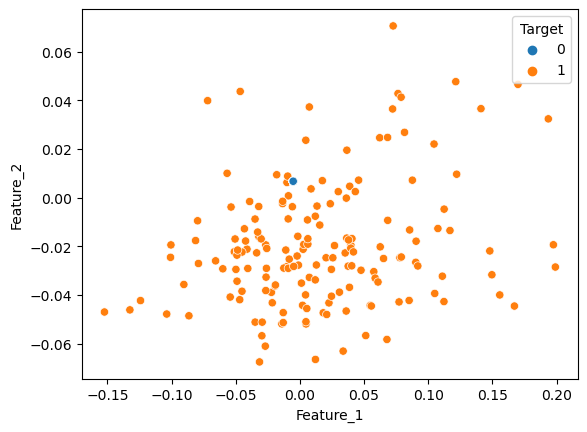

In [55]:
sns.scatterplot(data = x_pca, x='Feature_1', y='Feature_2', hue = 'Target')

In [57]:
X2p_train, X2p_test, y2p_train, y2p_test = train_test_split(x_pca, x_pca['Target'], test_size=0.3, random_state=0)

In [64]:
knn = KNeighborsClassifier(n_neighbors=5)
bpnn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
svm = SVC(kernel='rbf', gamma='scale', probability=True)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
ada_rf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0),
                            n_estimators=100, random_state=0)
ada_svm = AdaBoostClassifier(base_estimator=SVC(kernel='rbf', gamma='scale', probability=True),
                             n_estimators=100, random_state=0)
xgb = XGBClassifier()

In [65]:
models2p = [knn, bpnn, svm, rf, ada_rf, ada_svm, xgb]
model_names = ['KNN', 'BPNN', 'Kernel SVM', 'Random Forest', 'Adaboost Random Forest', 'Adaboost SVM', 'XGBoost']

In [66]:
for i, model2 in enumerate(models2p):
    print(f"Training {model_names[i]}...")
    model2.fit(X2p_train,y2p_train)

Training KNN...
Training BPNN...
Training Kernel SVM...
Training Random Forest...
Training Adaboost Random Forest...
Training Adaboost SVM...
Training XGBoost...


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN accuracy: 1.0
KNN confusion matrix:
[[152   0]
 [  0  46]]
KNN ROC AUC: 1.0


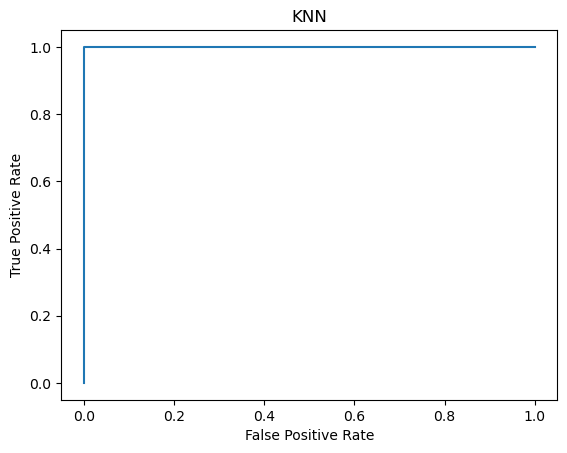

----------------------------------------------------
BPNN accuracy: 1.0
BPNN confusion matrix:
[[152   0]
 [  0  46]]
BPNN ROC AUC: 1.0


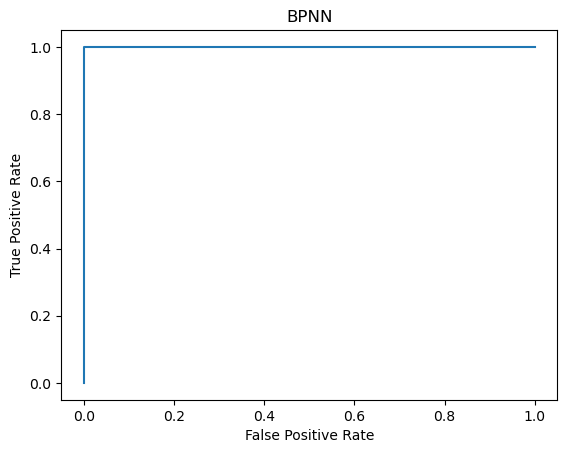

----------------------------------------------------
Kernel SVM accuracy: 1.0
Kernel SVM confusion matrix:
[[152   0]
 [  0  46]]
Kernel SVM ROC AUC: 1.0


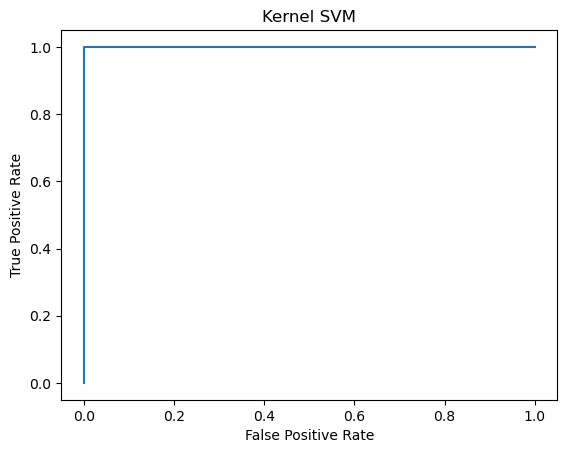

----------------------------------------------------
Random Forest accuracy: 1.0
Random Forest confusion matrix:
[[152   0]
 [  0  46]]
Random Forest ROC AUC: 1.0


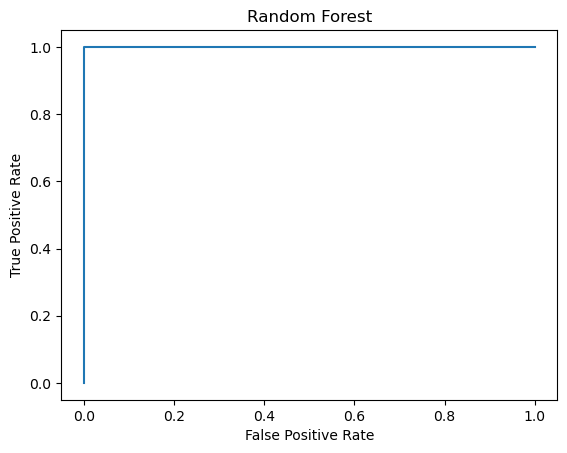

----------------------------------------------------
Adaboost Random Forest accuracy: 1.0
Adaboost Random Forest confusion matrix:
[[152   0]
 [  0  46]]
Adaboost Random Forest ROC AUC: 1.0


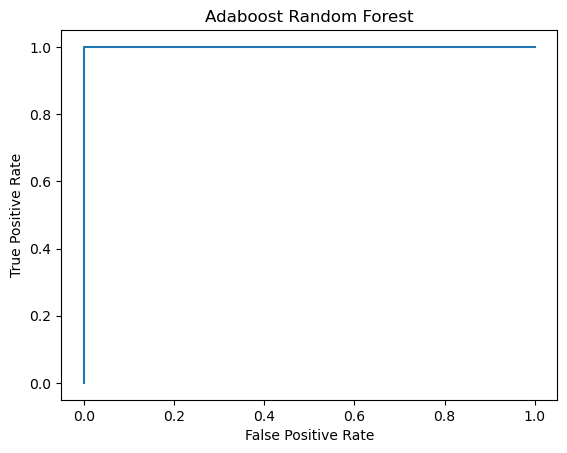

----------------------------------------------------
Adaboost SVM accuracy: 1.0
Adaboost SVM confusion matrix:
[[152   0]
 [  0  46]]
Adaboost SVM ROC AUC: 1.0


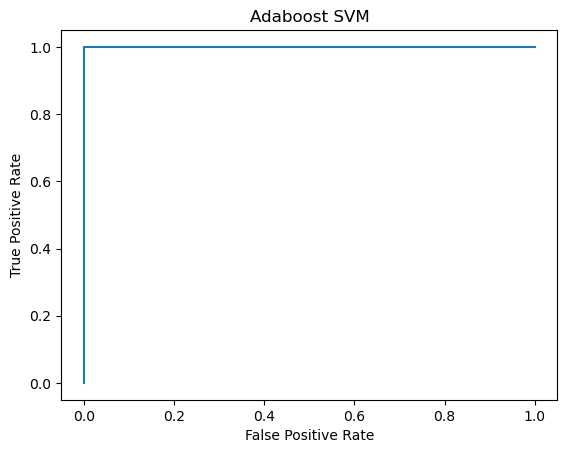

----------------------------------------------------
XGBoost accuracy: 1.0
XGBoost confusion matrix:
[[152   0]
 [  0  46]]
XGBoost ROC AUC: 1.0


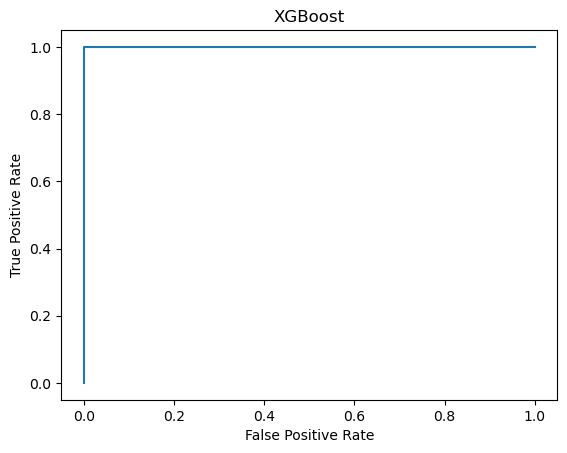

----------------------------------------------------


In [63]:
for i, model2 in enumerate(models2p):
    y_pred = model2.predict(X2p_test)
    acc = accuracy_score(y2p_test, y_pred)
    cm = confusion_matrix(y2p_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y2p_test, model2.predict_proba(X2p_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    print(f"{model_names[i]} accuracy: {acc}")
    print(f"{model_names[i]} confusion matrix:\n{cm}")
    print(f"{model_names[i]} ROC AUC: {roc_auc}")
    plt.plot(fpr,tpr)
    plt.title(model_names[i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print("----------------------------------------------------")
